Internet page with example for doing wordcloud in python:

https://www.kaggle.com/adiljadoon/word-cloud-with-python

In [1]:
import pandas as pd
df1 = pd.read_csv('https://query.data.world/s/dv2xwja6ue6tmbcqbst5dnilexrip4')
# dataset is at kaggle - https://data.world/webmadster/phmsa-hazardous-liquid-accident-data-since-2010

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (62,64,65,66,67,68,69,73,75,77,78,79,80,82,90,91,103,105,118,138,139,140,172,182,183,184,185,210,212,226,228,229,240,245,249,253,264,271,273,284,288,290,292,294,296,297,302,308,310,318,322,323,335,337,341,343,371,372,375,376,381,383,385,390,401,408,409,410,411,413,415,430,431,434,437,451,462,468,469,475,476,477,480,481,482,498,504,506,508,509,516,522,524,526,529,530,531,535,536,537,545,548,551,553,554,576) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df1.head()

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
0,2/27/2018,2018,20180064,23185,ORIGINAL FINAL,31618,ENTERPRISE PRODUCTS OPERATING LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,SR. PIPELINE COMPLIANCE ENGINEER,rsromero@eprod.com,713-381-6841,NaN,2/27/2018,RICHARD S ROMERO,SR. PIPELINE COMPLIANCE ENGINEER,713-381-6841,rsromero@eprod.com,ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFI...
1,2/20/2018,2018,20180058,23160,ORIGINAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,NaN,candress@eprod.com,713-381-6426,NaN,2/20/2018,CHASE ANDRESS,PIPELINE COMPLIANCE,713-381-6462,candress@eprod.com,ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2,2/14/2018,2018,20180042,23135,ORIGINAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,NaN,candress@eprod.com,713-381-6426,NaN,2/14/2018,CHASE ANDRESS,PIPELINE COMPLIANCE,713-381-6426,candress@eprod.com,ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
3,2/28/2018,2018,20180066,23190,ORIGINAL,39534,TORRANCE VALLEY PIPELINE COMPANY LLC,1 SYLVAN WAY 2ND FLOOR,PARSIPPANY,NJ,...,REGULATORY ADVISOR,thomas.slosson@pbfenergy.com,310-212-1764,NaN,2/28/2018,THOMAS MCLANE,DIRECTOR OF REGULATORY COMPLIANCE,281-661-4224,thomas.mclane@pbfenergy.com,"AT APPROXIMATELY 10:45 AM PST, AN OPERATOR AT ..."
4,2/22/2018,2018,20180061,23181,SUPPLEMENTAL FINAL,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 LOUISIANA STREET,HOUSTON,TX,...,NaN,candress@eprod.com,713-381-6426,NaN,2/26/2018,CHASE ANDRESS,PIPELINE COMPLIANCE,713-381-6426,candress@eprod.com,"ON 02-05-2018 AT APPROXIMATELY 20:15 HOURS, LO..."


In [3]:
df1.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TITLE', 'PREPARER_EMAIL', 'PREPARER_TELEPHONE',
       'PREPARER_FAX', 'PREPARED_DATE', 'AUTHORIZER_NAME', 'AUTHORIZER_TITLE',
       'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL', 'NARRATIVE'],
      dtype='object', length=588)

In [4]:
df1['NARRATIVE'].head(3)

0    ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFI...
1    ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2    ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
Name: NARRATIVE, dtype: object

In [5]:
df1['NARRATIVE'].iloc[1:10]

1    ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2    ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
3    AT APPROXIMATELY 10:45 AM PST, AN OPERATOR AT ...
4    ON 02-05-2018 AT APPROXIMATELY 20:15 HOURS, LO...
5    APPROXIMATELY 4 BBLS OF CRUDE OIL WERE RELEASE...
6    ON 2/1/2018, DCP OPERATOR WAS NOTIFIED BY DCP'...
7    ON 01-31-18 AT APPROXIMATELY 12:30 HOURS, LOCA...
8    THE PIPELINE CONTROLLER RECEIVED A HAZARDOUS A...
9    A CRACK IN A 3/8-INCH THREADED BALL VALVE CONN...
Name: NARRATIVE, dtype: object

In [6]:
narr = []
for text in df1['NARRATIVE']:
    narr.append(text)

In [7]:
narr[0]

'ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFIED AN ENTERPRISE EMPLOYEE OF A VAPOR CLOUD INSIDE THE SKELLYTOWN STATION. THE EMPLOYEE NOTIFIED PIPELINE CONTROL WHO THEN SHUTDOWN THE STATION. THE VAPOR CLOUD WAS COMING FROM A FITTING ON THE #1 MAINLINE PUMP. THE FITTING WAS REPLACED AND THE STATION WAS RE-STARTED.'

In [9]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 2.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/23/f9/5b/3fd378852bbeb8833fccc377757de44d7ea393863a368e4ffa
Successfully built wordcloud
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [11]:
!pip install wordcloud

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1

In [13]:
stopwords = set(STOPWORDS)

In [14]:
data = pd.DataFrame(narr)

In [15]:
data[0]

0       ON 2/19/2018 AN EMPLOYEE OF PHILLIPS 66 NOTIFI...
1       ON 2-10-18 AT APPROXIMATELY 22:20 LOCAL OPERAT...
2       ON 02-07-18 AT 12:27 PIPELINE CONTROL RECEIVED...
3       AT APPROXIMATELY 10:45 AM PST, AN OPERATOR AT ...
4       ON 02-05-2018 AT APPROXIMATELY 20:15 HOURS, LO...
5       APPROXIMATELY 4 BBLS OF CRUDE OIL WERE RELEASE...
6       ON 2/1/2018, DCP OPERATOR WAS NOTIFIED BY DCP'...
7       ON 01-31-18 AT APPROXIMATELY 12:30 HOURS, LOCA...
8       THE PIPELINE CONTROLLER RECEIVED A HAZARDOUS A...
9       A CRACK IN A 3/8-INCH THREADED BALL VALVE CONN...
10      CRUDE OIL LEAK DISCOVERED BY 3RD PARTY AND REP...
11      WHILE PERFORMING ROUTINE MAINTENANCE AT KINDER...
12      ON 1-25-18 A CONTRACTOR WORKING FOR ENTERPRISE...
13      ON JANUARY 24, 2018, AT APPROXIMATELY 1900, A ...
14      ON 01-23-18 AT APPROXIMATELY 21:00 HOURS, LOCA...
15      ON 1-23-18 AT APPROXIMATELY 1500 HOURS, LOCAL ...
16      ON JANUARY 23, 2018, HILAND CRUDE, LLC COMPLET...
17      ON JAN

In [16]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data[0]))

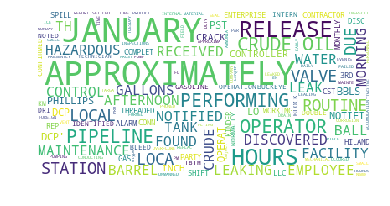

In [17]:
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)